In [40]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# remove warnings>
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor


from collections import Counter

In [41]:
iot = pd.read_csv('/kaggle/input/darknet2020/Darknet.CSV')
iot.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [42]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [43]:
#feature creation
#word embeddings for weird_notice
Label_locs = iot['Label'].unique()
Label_locs_mapping = dict(zip(Label_locs, range(0, len(Label_locs) + 1)))

iot['Label'] = iot['Label'] \
                               .map(Label_locs_mapping) \
                               .astype(float)

In [44]:
#word embeddings for src_ip
src_ip_locs = iot['Src IP'].unique()
src_ip_locs_mapping = dict(zip(src_ip_locs, range(0, len(src_ip_locs) + 1)))

iot['Src IP'] = iot['Src IP'] \
                               .map(src_ip_locs_mapping) \
                               .astype(float)

In [45]:
#word embeddings for dst_ip
dst_ip_locs = iot['Dst IP'].unique()
dst_ip_locs_mapping = dict(zip(dst_ip_locs, range(0, len(dst_ip_locs) + 1)))

iot['Dst IP'] = iot['Dst IP'] \
                               .map(dst_ip_locs_mapping) \
                               .astype(float)

In [46]:
#word embeddings 
dst_ip_locs = iot['Dst IP'].unique()
dst_ip_locs_mapping = dict(zip(dst_ip_locs, range(0, len(dst_ip_locs) + 1)))

iot['Dst IP'] = iot['Dst IP'] \
                               .map(dst_ip_locs_mapping) \
                               .astype(float)


proto_locs = iot['Dst Port'].unique()
proto_locs_mapping = dict(zip(proto_locs, range(0, len(proto_locs) + 1)))

iot['Dst Port'] = iot['Dst Port'] \
                               .map(proto_locs_mapping) \
                               .astype(float)


service_locs = iot['Flow Duration'].unique()
service_locs_mapping = dict(zip(service_locs, range(0, len(service_locs) + 1)))

iot['Flow Duration'] = iot['Flow Duration'] \
                               .map(service_locs_mapping) \
                               .astype(float)


conn_state_locs = iot['Protocol'].unique()
conn_state_locs_mapping = dict(zip(conn_state_locs, range(0, len(conn_state_locs) + 1)))

iot['Protocol'] = iot['Protocol'] \
                               .map(conn_state_locs_mapping) \
                               .astype(float)

dns_query_locs = iot['Flow Packets/s'].unique()
dns_query_locs_mapping = dict(zip(dns_query_locs, range(0, len(dns_query_locs) + 1)))

iot['Flow Packets/s'] = iot['Flow Packets/s'] \
                               .map(dns_query_locs_mapping) \
                               .astype(float)

type_locs = iot['Flow IAT Max'].unique()
type_locs_mapping = dict(zip(type_locs, range(0, len(type_locs) + 1)))

iot['Flow IAT Max'] = iot['Flow IAT Max'] \
                               .map(type_locs_mapping) \
                               .astype(float)


dns_AA_locs = iot['Flow IAT Min'].unique()
dns_AA_locs_mapping = dict(zip(dns_AA_locs, range(0, len(dns_AA_locs) + 1)))

iot['Flow IAT Min'] = iot['Flow IAT Min'] \
                               .map(dns_AA_locs_mapping) \
                               .astype(float)


dns_RD_locs = iot['Fwd Header Length'].unique()
dns_RD_locs_mapping = dict(zip(dns_RD_locs, range(0, len(dns_RD_locs) + 1)))

iot['Fwd Header Length'] = iot['Fwd Header Length'] \
                               .map(dns_RD_locs_mapping) \
                               .astype(float)


dns_RA_locs = iot['Bwd Packets/s'].unique()
dns_RA_locs_mapping = dict(zip(dns_RA_locs, range(0, len(dns_RA_locs) + 1)))

iot['Bwd Packets/s'] = iot['Bwd Packets/s'] \
                               .map(dns_RA_locs_mapping) \
                               .astype(float)


dns_rejected_locs = iot['Fwd Packets/s'].unique()
dns_rejected_locs_mapping = dict(zip(dns_rejected_locs, range(0, len(dns_rejected_locs) + 1)))

iot['Fwd Packets/s'] = iot['Fwd Packets/s'] \
                               .map(dns_rejected_locs_mapping) \
                               .astype(float)


ssl_version_locs = iot['Packet Length Min'].unique()
ssl_version_locs_mapping = dict(zip(ssl_version_locs, range(0, len(ssl_version_locs) + 1)))

iot['Packet Length Min'] = iot['Packet Length Min'] \
                               .map(ssl_version_locs_mapping) \
                               .astype(float)


ssl_cipher_locs = iot['Packet Length Max'].unique()
ssl_cipher_locs_mapping = dict(zip(ssl_cipher_locs, range(0, len(ssl_cipher_locs) + 1)))

iot['Packet Length Max'] = iot['Packet Length Max'] \
                               .map(ssl_cipher_locs_mapping) \
                               .astype(float)


ssl_resumed_locs = iot['Packet Length Mean'].unique()
ssl_resumed_locs_mapping = dict(zip(ssl_resumed_locs, range(0, len(ssl_resumed_locs) + 1)))

iot['Packet Length Mean'] = iot['Packet Length Mean'] \
                               .map(ssl_resumed_locs_mapping) \
                               .astype(float)


ssl_established_locs = iot['Packet Length Std'].unique()
ssl_established_locs_mapping = dict(zip(ssl_established_locs, range(0, len(ssl_established_locs) + 1)))

iot['Packet Length Std'] = iot['Packet Length Std'] \
                               .map(ssl_established_locs_mapping) \
                               .astype(float)


ssl_subject_locs = iot['Packet Length Variance'].unique()
ssl_subject_locs_mapping = dict(zip(ssl_subject_locs, range(0, len(ssl_subject_locs) + 1)))

iot['Packet Length Variance'] = iot['Packet Length Variance'] \
                               .map(ssl_subject_locs_mapping) \
                               .astype(float)


ssl_issuer_locs = iot['FIN Flag Count'].unique()
ssl_issuer_locs_mapping = dict(zip(ssl_issuer_locs, range(0, len(ssl_issuer_locs) + 1)))

iot['FIN Flag Count'] = iot['FIN Flag Count'] \
                               .map(ssl_issuer_locs_mapping) \
                               .astype(float)


http_trans_depth_locs = iot['SYN Flag Count'].unique()
http_trans_depth_locs_mapping = dict(zip(http_trans_depth_locs, range(0, len(http_trans_depth_locs) + 1)))

iot['SYN Flag Count'] = iot['SYN Flag Count'] \
                               .map(http_trans_depth_locs_mapping) \
                               .astype(float)


http_method_locs = iot['RST Flag Count'].unique()
http_method_locs_mapping = dict(zip(http_method_locs, range(0, len(http_method_locs) + 1)))

iot['RST Flag Count'] = iot['RST Flag Count'] \
                               .map(http_method_locs_mapping) \
                               .astype(float)


http_uri_locs = iot['PSH Flag Count'].unique()
http_uri_locs_mapping = dict(zip(http_uri_locs, range(0, len(http_uri_locs) + 1)))

iot['PSH Flag Count'] = iot['PSH Flag Count'] \
                               .map(http_uri_locs_mapping) \
                               .astype(float)


http_version_locs = iot['ACK Flag Count'].unique()
http_version_locs_mapping = dict(zip(http_version_locs, range(0, len(http_version_locs) + 1)))

iot['ACK Flag Count'] = iot['ACK Flag Count'] \
                               .map(http_version_locs_mapping) \
                               .astype(float)


http_user_agent_locs = iot['URG Flag Count'].unique()
http_user_agent_locs_mapping = dict(zip(http_user_agent_locs, range(0, len(http_user_agent_locs) + 1)))

iot['URG Flag Count'] = iot['URG Flag Count'] \
                               .map(http_user_agent_locs_mapping) \
                               .astype(float)


http_orig_mime_types_locs = iot['CWE Flag Count'].unique()
http_orig_mime_types_locs_mapping = dict(zip(http_orig_mime_types_locs, range(0, len(http_orig_mime_types_locs) + 1)))

iot['CWE Flag Count'] = iot['CWE Flag Count'] \
                               .map(http_orig_mime_types_locs_mapping) \
                               .astype(float)


http_resp_mime_types_locs = iot['Down/Up Ratio'].unique()
http_resp_mime_types_locs_mapping = dict(zip(http_resp_mime_types_locs, range(0, len(http_resp_mime_types_locs) + 1)))

iot['Down/Up Ratio'] = iot['Down/Up Ratio'] \
                               .map(http_resp_mime_types_locs_mapping) \
                               .astype(float)


Fwd_Segment_locs = iot['Fwd Segment Size Avg'].unique()
Fwd_Segment_locs_mapping = dict(zip(Fwd_Segment_locs, range(0, len(Fwd_Segment_locs) + 1)))

iot['Fwd Segment Size Avg'] = iot['Fwd Segment Size Avg'] \
                               .map(Fwd_Segment_locs_mapping) \
                               .astype(float)

Label_1_locs = iot['Label.1'].unique()
Label_1_locs_mapping = dict(zip(Label_1_locs, range(0, len(Label_1_locs) + 1)))

iot['Label.1'] = iot['Label.1'] \
                               .map(Label_1_locs_mapping) \
                               .astype(float)

Flow_ID_locs = iot['Flow ID'].unique()
Flow_ID_locs_mapping = dict(zip(Flow_ID_locs, range(0, len(Flow_ID_locs) + 1)))

iot['Flow ID'] = iot['Flow ID'] \
                               .map(Flow_ID_locs_mapping) \
                               .astype(float)

Timestamp_locs = iot['Timestamp'].unique()
Timestamp_locs_mapping = dict(zip(Timestamp_locs, range(0, len(Timestamp_locs) + 1)))

iot['Timestamp'] = iot['Timestamp'] \
                               .map(Timestamp_locs_mapping) \
                               .astype(float)

Idle_Mean_locs = iot['Idle Mean'].unique()
Idle_Mean_locs_mapping = dict(zip(Idle_Mean_locs, range(0, len(Idle_Mean_locs) + 1)))

iot['Idle Mean'] = iot['Idle Mean'] \
                               .map(weird_addl_locs_mapping) \
                               .astype(float)

Idle_Max_locs = iot['Idle Max'].unique()
Idle_Max_locs_mapping = dict(zip(Idle_Max_locs, range(0, len(Idle_Max_locs) + 1)))

iot['Idle Max'] = iot['Idle Max'] \
                               .map(Idle_Max_locs_mapping) \
                               .astype(float)

Idle_Min_locs = iot['Idle Min'].unique()
Idle_Min_locs_mapping = dict(zip(Idle_Min_locs, range(0, len(Idle_Min_locs) + 1)))

iot['Idle Min'] = iot['Idle Min'] \
                               .map(Idle_Min_locs_mapping) \
                               .astype(float)

Idle_Std_locs = iot['Idle Std'].unique()
Idle_Std_locs_mapping = dict(zip(Idle_Std_locs, range(0, len(Idle_Std_locs) + 1)))

iot['Idle Std'] = iot['Idle Std'] \
                               .map(Idle_Std_locs_mapping) \
                               .astype(float)

iot.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,0.0,0.0,57158,0.0,0.0,0.0,0.0,0.0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,57159,0.0,0.0,0.0,0.0,1.0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,57160,0.0,0.0,0.0,0.0,2.0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,49134,1.0,0.0,0.0,0.0,3.0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,34697,2.0,1.0,0.0,1.0,4.0,591,400,...,0,0,0,0,NaN,1.0,1.0,1.0,0.0,0.0
5,5.0,0.0,54570,2.0,0.0,0.0,2.0,5.0,5,3,...,0,0,0,0,NaN,2.0,2.0,2.0,0.0,0.0
6,6.0,1.0,443,3.0,2.0,0.0,1.0,6.0,488,487,...,0,0,0,0,NaN,3.0,2.0,1.0,0.0,0.0
7,7.0,0.0,57361,4.0,0.0,0.0,3.0,7.0,369,378,...,0,0,0,0,NaN,4.0,2.0,1.0,0.0,0.0
8,8.0,2.0,443,3.0,3.0,0.0,0.0,8.0,61,60,...,0,0,0,0,NaN,5.0,2.0,1.0,0.0,0.0
9,9.0,0.0,34702,2.0,1.0,0.0,2.0,9.0,3638,3157,...,0,0,0,0,NaN,6.0,2.0,2.0,0.0,0.0


In [47]:
# Replace infinite updated data with nan
iot.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
iot.dropna(inplace=True)
print(iot)

        Flow ID  Src IP  Src Port  Dst IP  Dst Port  Protocol  Timestamp  \
0           0.0     0.0     57158     0.0       0.0       0.0        0.0   
1           1.0     0.0     57159     0.0       0.0       0.0        0.0   
2           2.0     0.0     57160     0.0       0.0       0.0        0.0   
3           3.0     0.0     49134     1.0       0.0       0.0        0.0   
202         8.0     2.0       443     3.0       3.0       0.0      187.0   
...         ...     ...       ...     ...       ...       ...        ...   
141524  77564.0  3910.0     49158  5591.0       7.0       1.0    29188.0   
141525  77565.0  3910.0     55219  5505.0   10706.0       1.0    29316.0   
141526  77566.0  3910.0     64207  5505.0   10706.0       1.0    29189.0   
141527  77567.0  3910.0     61115  5505.0   10706.0       1.0    29258.0   
141528  77032.0  3910.0     64790  5505.0   10706.0       1.0    29221.0   

        Flow Duration  Total Fwd Packet  Total Bwd packets  ...  Active Mean  \
0      

In [48]:
print('If there is any missing data in the dataset: \n',any(iot.isnull()))

If there is any missing data in the dataset: 
 True


In [49]:
#delete the rows if there are null values
iot=iot.dropna(axis=0,how='any')

In [50]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68169 entries, 0 to 141528
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     68169 non-null  float64
 1   Src IP                      68169 non-null  float64
 2   Src Port                    68169 non-null  int64  
 3   Dst IP                      68169 non-null  float64
 4   Dst Port                    68169 non-null  float64
 5   Protocol                    68169 non-null  float64
 6   Timestamp                   68169 non-null  float64
 7   Flow Duration               68169 non-null  float64
 8   Total Fwd Packet            68169 non-null  int64  
 9   Total Bwd packets           68169 non-null  int64  
 10  Total Length of Fwd Packet  68169 non-null  int64  
 11  Total Length of Bwd Packet  68169 non-null  int64  
 12  Fwd Packet Length Max       68169 non-null  int64  
 13  Fwd Packet Length Min       68

In [51]:
data = iot.sample(n = 5000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 135945 to 75081
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     5000 non-null   float64
 1   Src IP                      5000 non-null   float64
 2   Src Port                    5000 non-null   int64  
 3   Dst IP                      5000 non-null   float64
 4   Dst Port                    5000 non-null   float64
 5   Protocol                    5000 non-null   float64
 6   Timestamp                   5000 non-null   float64
 7   Flow Duration               5000 non-null   float64
 8   Total Fwd Packet            5000 non-null   int64  
 9   Total Bwd packets           5000 non-null   int64  
 10  Total Length of Fwd Packet  5000 non-null   int64  
 11  Total Length of Bwd Packet  5000 non-null   int64  
 12  Fwd Packet Length Max       5000 non-null   int64  
 13  Fwd Packet Length Min      

In [52]:
print('If there is any missing data in the dataset: \n',any(data.isnull()))

If there is any missing data in the dataset: 
 True


In [53]:
#delete the rows if there are null values
data=data.dropna(axis=0,how='any')

<AxesSubplot:>

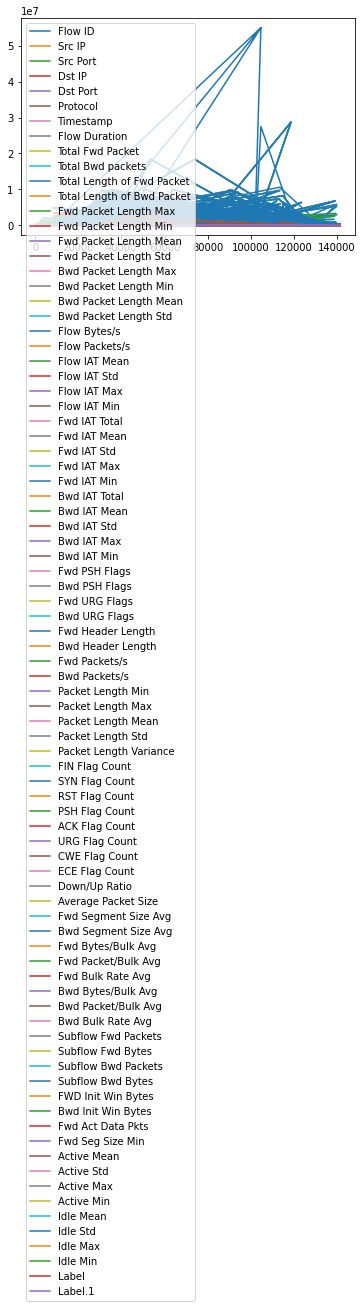

In [54]:
data.plot()

0.0    2498
3.0    1295
1.0    1195
2.0      12
Name: Label, dtype: int64


Text(0, 0.5, 'Percentage')

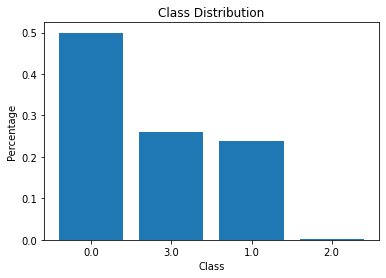

In [55]:
#check imblance
# Use the `value_counts` method to check the count of each class in the variable
class_dist = data['Label'].value_counts()
print(class_dist)

# Create a bar plot of this distribution using matplotlib
plt.bar(class_dist.index.astype(str), class_dist.values/sum(class_dist.values))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

<AxesSubplot:ylabel='Label'>

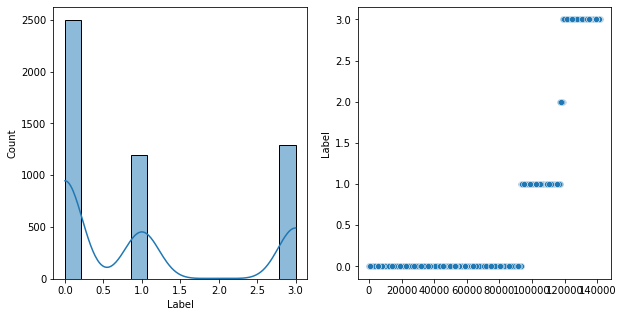

In [56]:
#label distribution
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data, x='Label',kde=True,ax=ax[0])

sns.scatterplot(data=data,x=data.index, y='Label',ax=ax[1])

<AxesSubplot:>

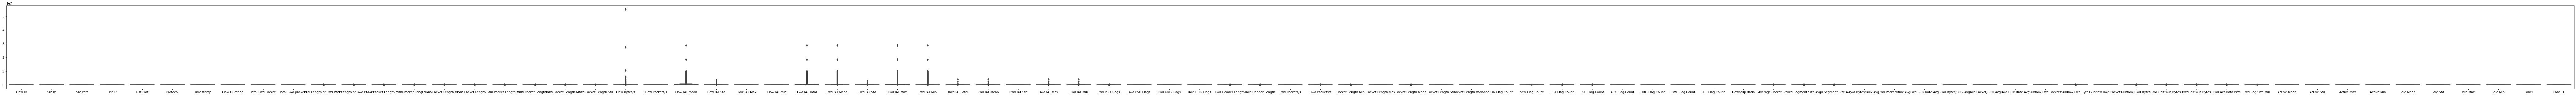

In [57]:
#check if there are any exceptions
plt.figure(figsize=(150,5)) 
sns.boxplot(data=data)

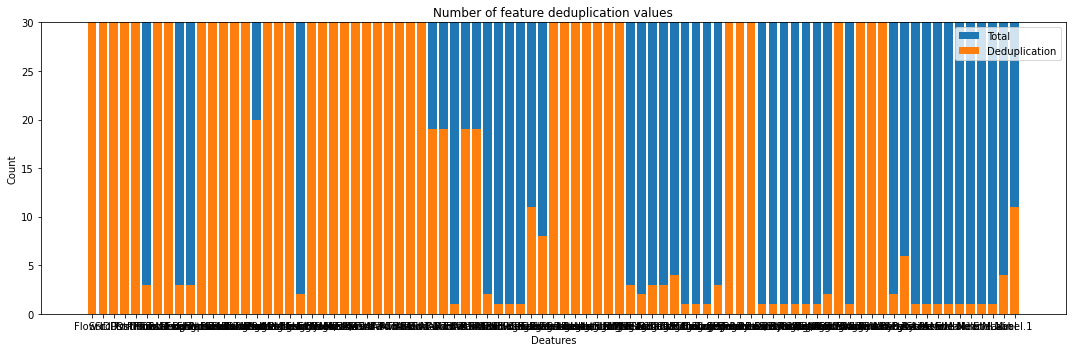

In [58]:
#check the numbers of different features
lists_unique=[data[col].nunique() for col in data.columns]

plt.figure(figsize=(15,5))
plt.bar(data.columns, [data.shape[0]]*data.shape[1])
plt.bar(data.columns, np.array(lists_unique)) 

plt.ylim(0,30)
plt.title('Number of feature deduplication values')
plt.xlabel('Deatures')
plt.ylabel('Count')
plt.legend(['Total','Deduplication'])
plt.tight_layout()
plt.show()

<AxesSubplot:>

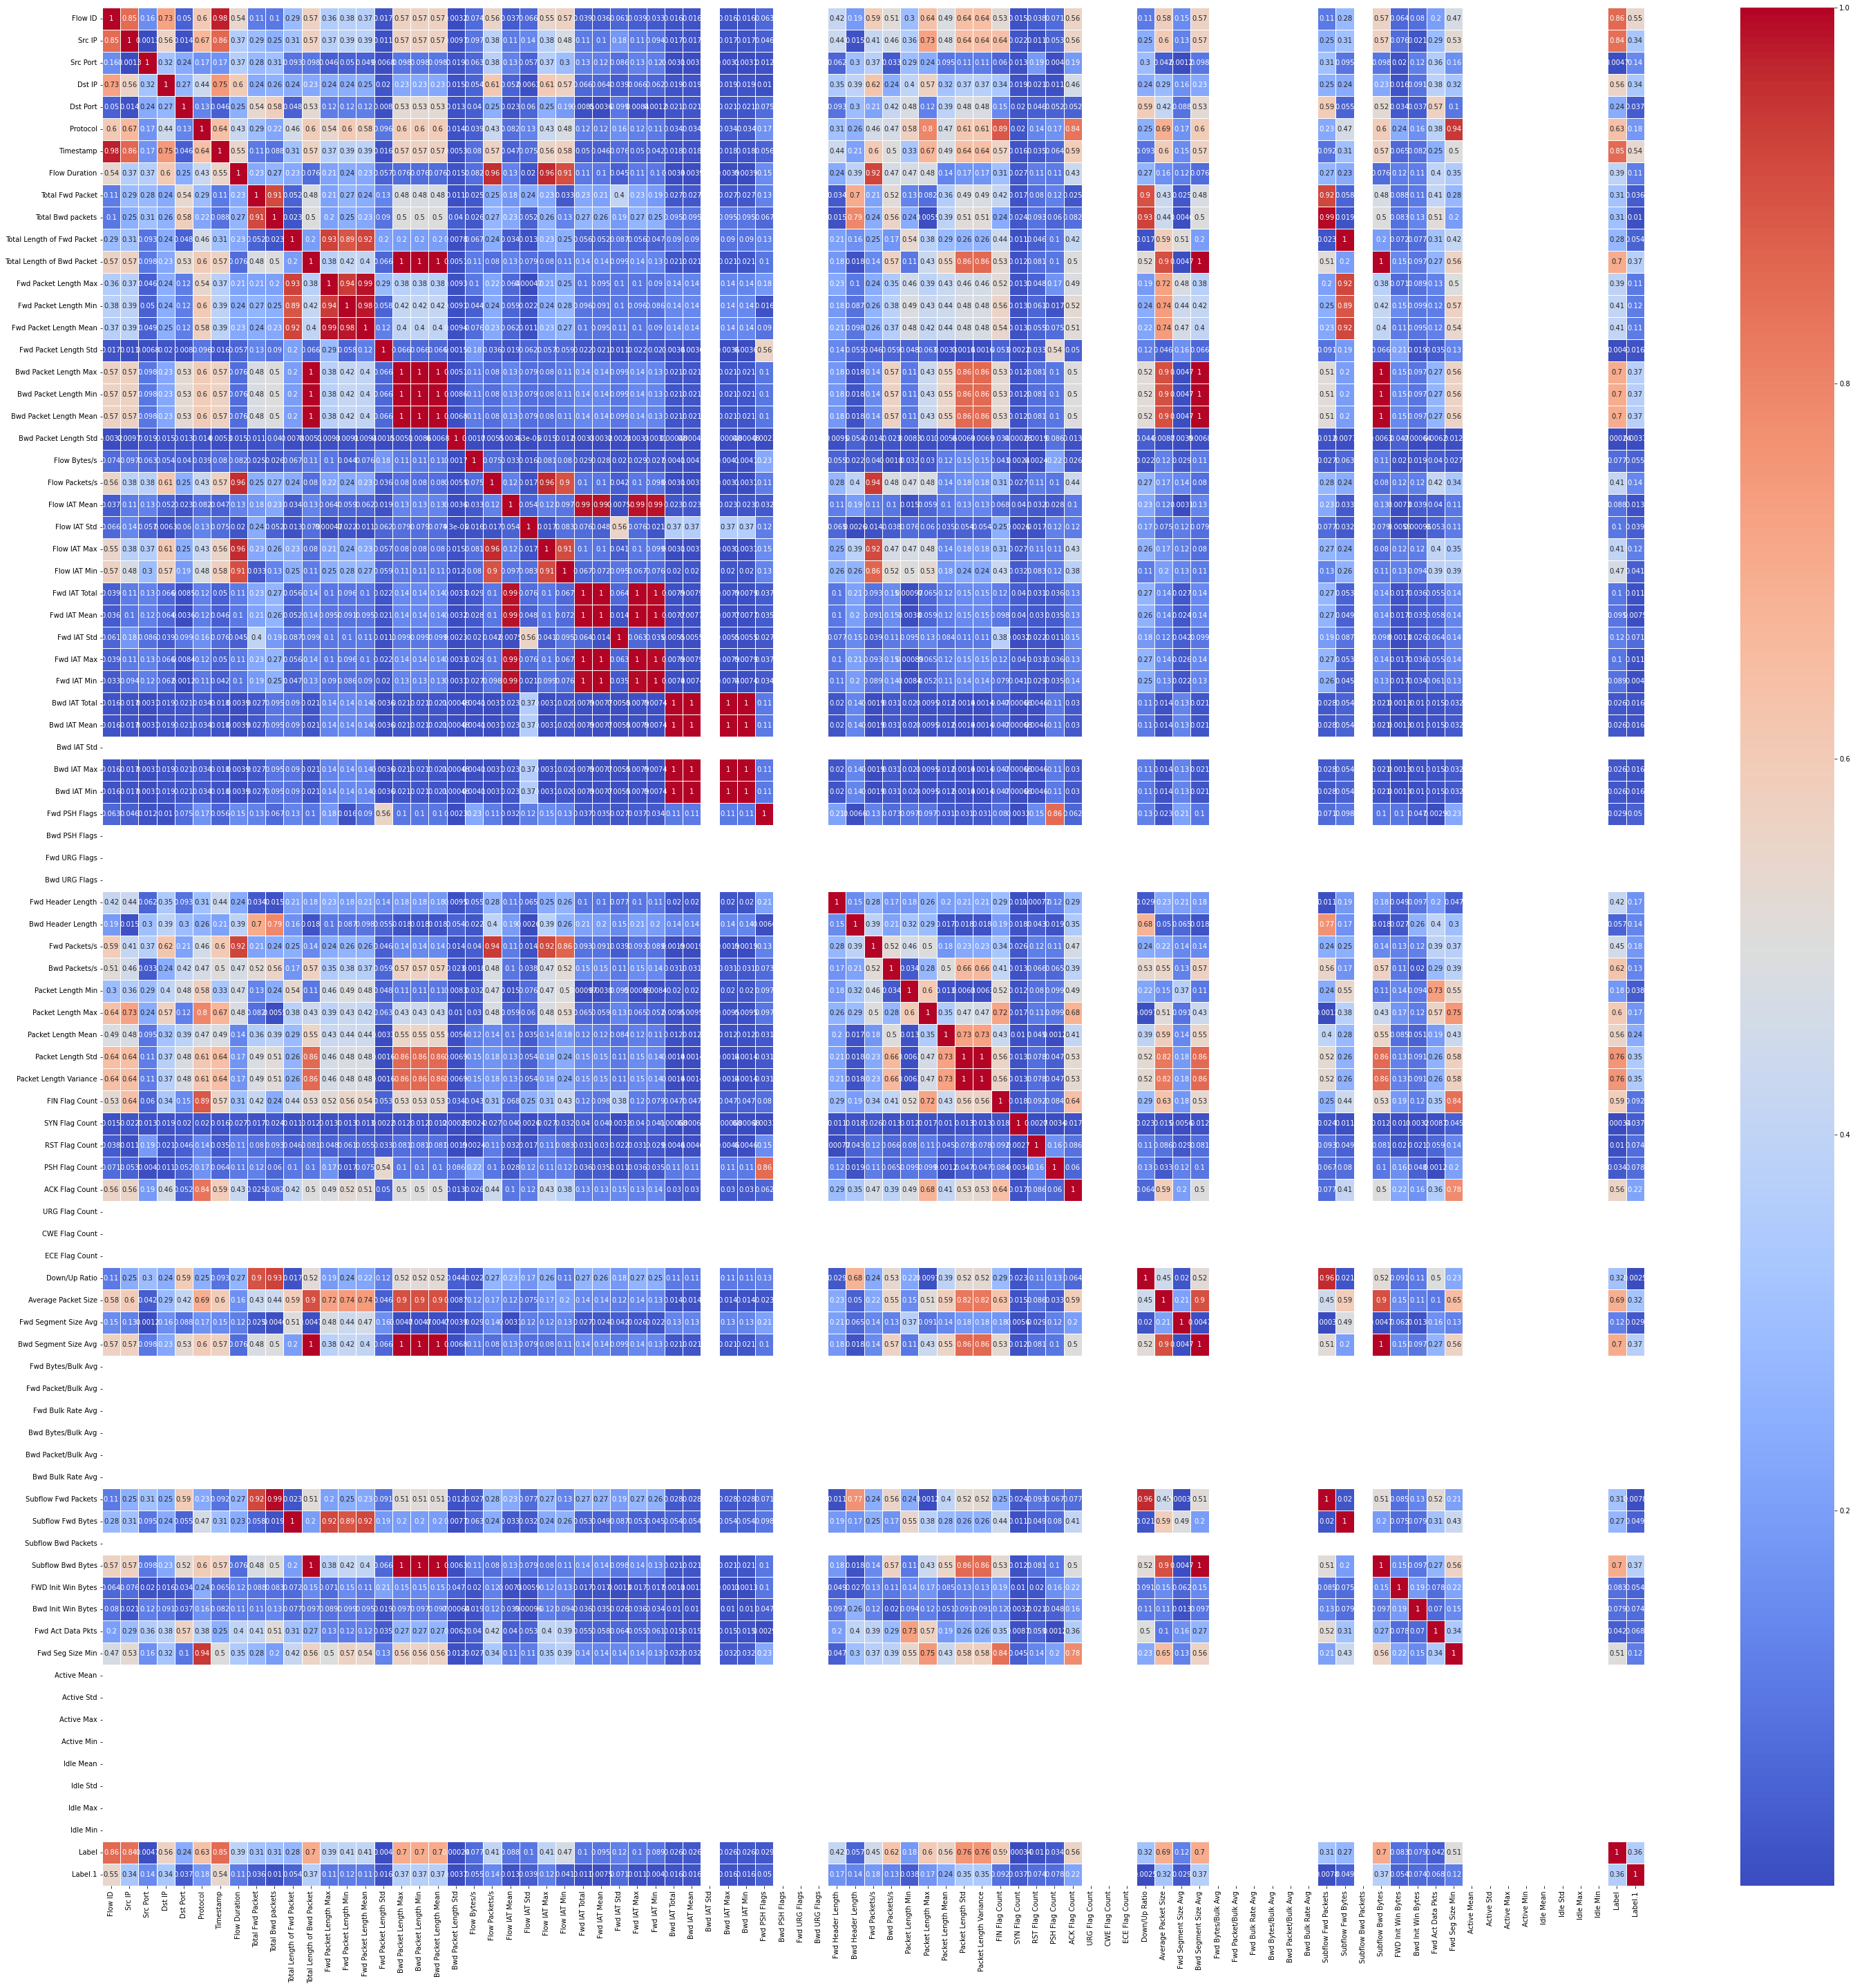

In [59]:
#draw the correlation coefficient graph
plt.figure(figsize=(50,50))
data_corr = data.corr().abs()
sns.heatmap(data_corr,annot=True,cmap='coolwarm',linewidths=.5)

In [60]:
#train the model and split
from sklearn.model_selection import train_test_split

features = data.drop(['Label'],axis=1)
target = data[['Label']]
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=123,shuffle=True)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4000, 84) (1000, 84)
(4000, 1) (1000, 1)


In [61]:
#baseline
predict=np.array([np.median(y_train)]*len(y_train))
baseline_score=f1_score(y_train,predict,average='weighted')

baseline_score = round(baseline_score.mean(),10)
print(baseline_score)

0.0925538524


Model Selection

In [62]:
#GaussianNB
bys = GaussianNB()
bys.fit(x_train, y_train)
bys_train_score = cross_val_score(bys, x_train, y_train, scoring='f1_weighted',cv=5)
bys_train_score = round(bys_train_score.mean(),10)
bys_score = bys.score(x_test, y_test)
bys_prediction = bys.predict(x_test)

print(bys_train_score)
print(bys_score)
print(classification_report(y_test,bys_prediction))

0.8995533763
0.904
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       515
         1.0       0.99      0.65      0.78       237
         2.0       1.00      0.25      0.40         4
         3.0       0.73      0.98      0.84       244

    accuracy                           0.90      1000
   macro avg       0.93      0.72      0.75      1000
weighted avg       0.93      0.90      0.90      1000



In [63]:
#XGBClassifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(max_depth= 100)
xgb_classifier.fit(x_train, y_train)
xgb_train_score = cross_val_score(xgb_classifier, x_train, y_train, scoring='f1_weighted',cv=5)
xgb_train_score = round(xgb_train_score.mean(),10)
xgb_score = xgb_classifier.score(x_test, y_test)
xgb_prediction = xgb_classifier.predict(x_test)

print(xgb_train_score)
print(xgb_score)
print(classification_report(y_test,xgb_prediction))

0.9990424733
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       515
         1.0       1.00      1.00      1.00       237
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00       244

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [64]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
svc_train_score = cross_val_score(linear_svc, x_train, y_train, scoring='f1_weighted',cv=5)
svc_train_score = round(svc_train_score.mean(),10)
svc_score = linear_svc.score(x_test, y_test)
svc_prediction = linear_svc.predict(x_test)

print(svc_train_score)
print(svc_score)
print(classification_report(y_test,svc_prediction))
#LinearSVC

0.7393541875
0.68
              precision    recall  f1-score   support

         0.0       0.73      0.92      0.82       515
         1.0       0.48      0.25      0.33       237
         2.0       0.00      0.00      0.00         4
         3.0       0.81      0.59      0.69       244

    accuracy                           0.68      1000
   macro avg       0.51      0.44      0.46      1000
weighted avg       0.69      0.68      0.67      1000



In [65]:
#LGBMClassifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
lgb_train_score = cross_val_score(lgb_model, x_train, y_train, scoring='f1_weighted',cv=5)
lgb_train_score = round(lgb_train_score.mean(),10)
lgb_score = lgb_model.score(x_test, y_test)
lgb_prediction = lgb_model.predict(x_test)

print(lgb_train_score)
print(lgb_score)
print(classification_report(y_test,lgb_prediction))

0.9997913403
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       515
         1.0       1.00      1.00      1.00       237
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00       244

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [66]:
models = pd.DataFrame({
    'Model': ['GaussianNB', 'XGBClassifier', 
              'LinearSVC', 'LGBMClassifier', 'baseline_model'],
        'test_Score': [bys_score, xgb_score, svc_score,
                 lgb_score, baseline_score]
})
print(models)

            Model  test_Score
0      GaussianNB    0.904000
1   XGBClassifier    1.000000
2       LinearSVC    0.680000
3  LGBMClassifier    1.000000
4  baseline_model    0.092554


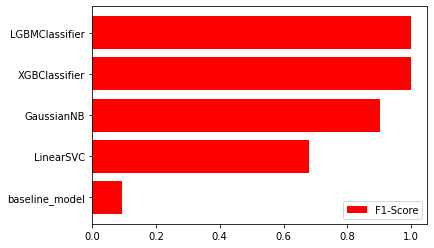

In [67]:
#compare the f1 score, performance of all the models
index=models.sort_values(by='test_Score', ascending=True).index
data_plot=models.loc[index,:]
plt.barh(data_plot.Model,data_plot.test_Score,color='r')
plt.legend(['F1-Score'])